<a href="https://colab.research.google.com/github/piusAI/Pytorch-Tutorial-Codemy.com/blob/main/05_STUD01_Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Torch import Function
Function Have SIgmoid, Relu

In [70]:
import torch
import torch.nn as nn
import torch.nn.functional as F

SoftMax In Numpy

In [71]:
#In Numpy ! !
import numpy as np

def NPsoftmax(x):
  c=np.max(x, axis=1, keepdims=True)           #protect OverFlow => Max in Rows
  exp_a=np.exp(x-c)
  sum_a=np.sum(exp_a, axis=1, keepdims=True)  #Sum In Rows
  y=exp_a/sum_a
  return y

#In torch.nn.functional ! !
import torch.nn.functional as F

def PTsoftmax(x):
  return F.softmax(x, dim=1)

X=np.random.choice(10,24).reshape(4,-1)
print(X)
print(NPsoftmax(X))

tensor_X=torch.from_numpy(X).float()     #make Float in tensor softmax!
print(tensor_X)
print(PTsoftmax(tensor_X))

[[7 3 4 0 1 0]
 [6 2 3 9 5 0]
 [2 1 2 3 6 6]
 [6 4 6 8 9 2]]
[[9.32483336e-01 1.70790280e-02 4.64256116e-02 8.50314737e-04
  2.31139510e-03 8.50314737e-04]
 [4.64597705e-02 8.50940380e-04 2.31309577e-03 9.33169437e-01
  1.70915944e-02 1.15162257e-04]
 [8.75024906e-03 3.21903673e-03 8.75024906e-03 2.37856430e-02
  4.77747411e-01 4.77747411e-01]
 [3.37515785e-02 4.56777943e-03 3.37515785e-02 2.49392307e-01
  6.77918575e-01 6.18181723e-04]]
tensor([[7., 3., 4., 0., 1., 0.],
        [6., 2., 3., 9., 5., 0.],
        [2., 1., 2., 3., 6., 6.],
        [6., 4., 6., 8., 9., 2.]])
tensor([[9.3248e-01, 1.7079e-02, 4.6426e-02, 8.5031e-04, 2.3114e-03, 8.5031e-04],
        [4.6460e-02, 8.5094e-04, 2.3131e-03, 9.3317e-01, 1.7092e-02, 1.1516e-04],
        [8.7502e-03, 3.2190e-03, 8.7502e-03, 2.3786e-02, 4.7775e-01, 4.7775e-01],
        [3.3752e-02, 4.5678e-03, 3.3752e-02, 2.4939e-01, 6.7792e-01, 6.1818e-04]])


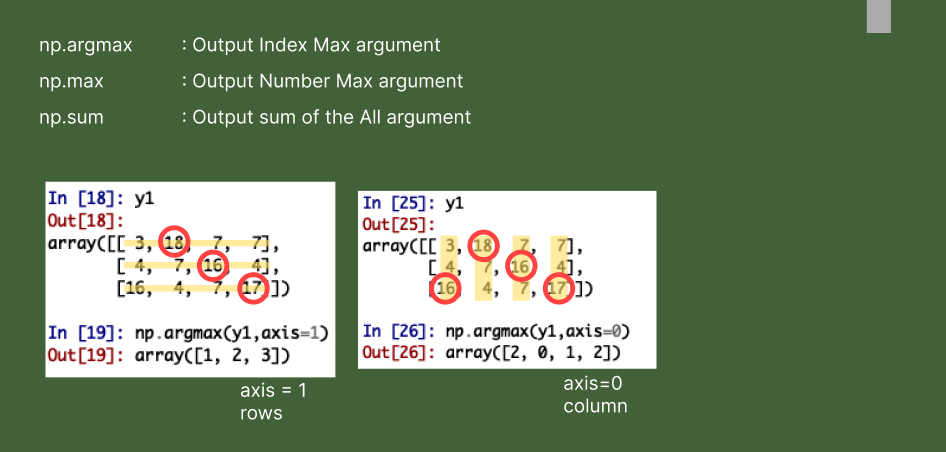
Rows : axis=1

Column, axis=0

#Class
- Super Class and Parent Class
- OOP, inheritance, Encapsulation

In [72]:
#Super Class  ≒ Parent Class

##EX1) SuperClass & Parent Class
class Animal :
  def __init__(self):
    print("Animal Created!")

class dog(Animal):
  def __init__(self):
    super().__init__()      #super Class상속 / Parent class 상속
    print("dog Created!")

dog()

Animal Created!
dog Created!


In [75]:
##EX single Class, dog function (Class + Method(def))

# OOP✅   Not Inheritance❌  Encapsulation✅
class Animals:
  def __init__(self):
    print('Animals Shout!')
  def dog(self):          # Encapsulation !
    print('Dog Shout!')

# dog()
class Coco(Animals):       # Inheritance ! !
  def __init__(self):
    super().__init__()    # Get the data in Super class!
    print("i'm Coco")

c=Coco()
print(c)

Animals Shout!
i'm Coco


#Foward Propagation

In [77]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=7, h2=9, out_features=3): # Model Rig(뼈대 / argumen) Declare
    super().__init__()
    self.fc1=nn.Linear(in_features, h1)     # Linear 변환, fc1(x) : x * W1 + b1
    self.fc2=nn.Linear(h1,h2)               # Linear 변환, fc2(x) : a1 * W2 + b2
    self.out=nn.Linear(h2, out_features)    # Linear 변환, fc3(x) : a2 * W3 + b3

  def forward(self, x):
    x = F.relu(self.fc1(x))     # 1 Grade : Affine => Relu
    x = F.relue(self.fc2(x))    # 2 Grade : Affine => Relu
    x = self.out(x)             # 3 Grade : Affine => Relu
    return x

## I Cannot draw code by myself

##MLP Foward Propagation 계산 순서

Input(x)


```
self.fc1=nn.Linear(in_features, h1)
```

=> fc1(x) : x * W1 + b1


```
x = F.relu(self.fc1(x))
```
=> relu( fc1(x) ) : ReLu( x * W1+ b1 )  => a1

=> fc2(x) : a1 * W2 + b2

=> relu( fc2(x) ) => a2

=> out : a2 * W3 + b3
